# CS 458

## Antonio Lang

# P4-1. Hierarchical Clustering Dendrogram

In [117]:
# Part A

import numpy as np 
np.random.seed(0) 
X1 = np.random.randn(50,2)+[2,2] 
X2 = np.random.randn(50,2)+[6,10] 
X3 = np.random.randn(50,2)+[10,2] 
X = np.concatenate((X1,X2,X3))

In [118]:
# Part B

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

models = []
linkages = ['ward', 'complete', 'average', 'single']
for linkage in linkages:
    model = (AgglomerativeClustering(distance_threshold=0, n_clusters=None,
                                            linkage=linkage))
    model = model.fit(X)
    models.append(model)

In [119]:
def plot_dendrogram(model, **kwargs): # referenced from scikit-learn
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                        counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

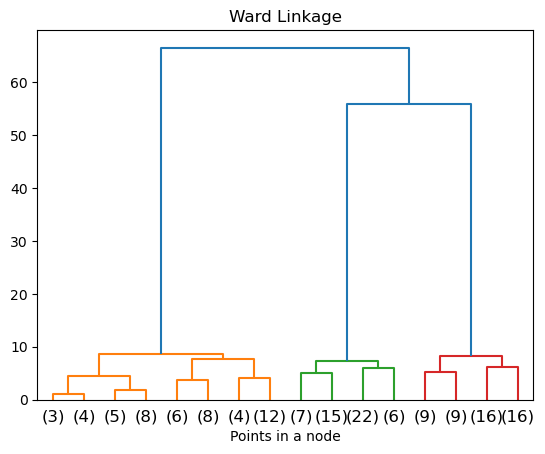

In [120]:
from matplotlib import pyplot as plt
plt.title('Ward Linkage')
plot_dendrogram(models[0], truncate_mode="level", p=3)
plt.xlabel("Points in a node")
plt.show()

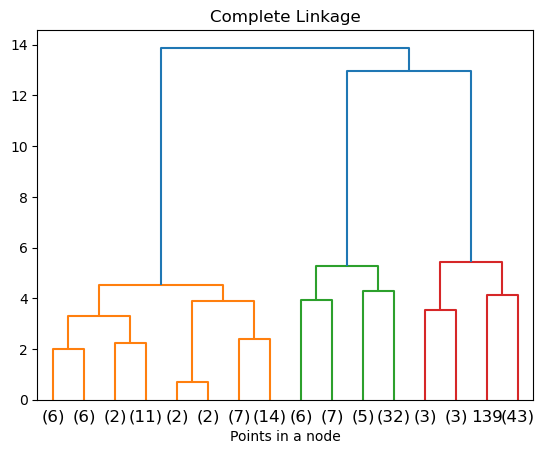

In [121]:
from matplotlib import pyplot as plt
plt.title('Complete Linkage')
plot_dendrogram(models[1], truncate_mode="level", p=3)
plt.xlabel("Points in a node")
plt.show()

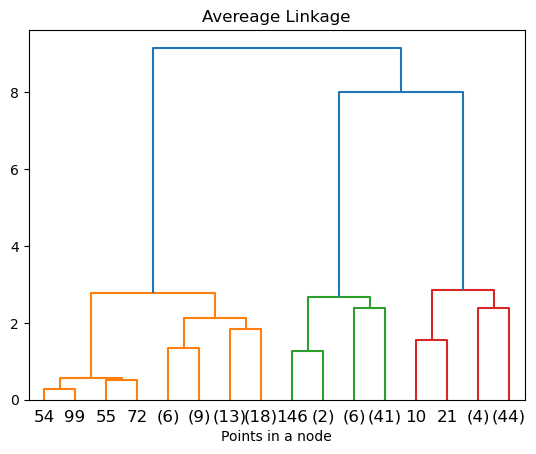

In [122]:
from matplotlib import pyplot as plt
plt.title('Avereage Linkage')
plot_dendrogram(models[2], truncate_mode="level", p=3)
plt.xlabel("Points in a node")
plt.show()

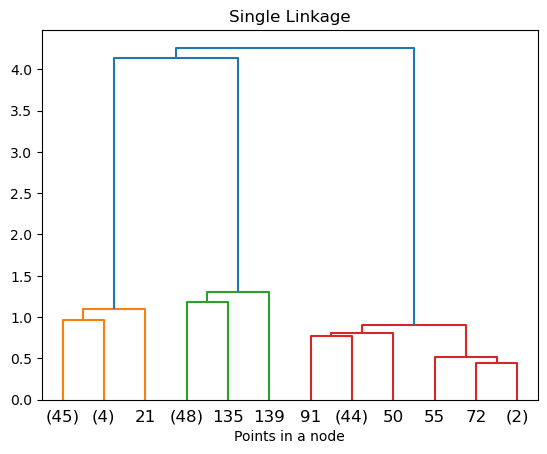

In [123]:
from matplotlib import pyplot as plt
plt.title('Single Linkage')
plot_dendrogram(models[3], truncate_mode="level", p=3)
plt.xlabel("Points in a node")
plt.show()

# P4-2. Clustering Structured Dataset

In [124]:
# Part A

from sklearn.datasets import make_swiss_roll 
# Generate data (swiss roll dataset) 
n_samples = 1500 
noise = 0.05 
X, _ = make_swiss_roll(n_samples, noise=noise) 
# Make it thinner 
X[:, 1] *= .5 

Text(0.5, 0.92, 'Agglomerative Clusterings')

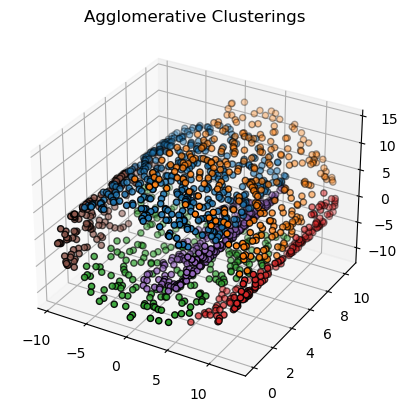

In [125]:
# Part B

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
connectivty = kneighbors_graph(X, n_neighbors=10, include_self=False)
agg_cluster = AgglomerativeClustering(n_clusters=6, connectivity=connectivty, linkage='ward').fit(X)
agg_labels = agg_cluster.labels_
fig = plt.figure()
ax = plt.axes(projection='3d')

for l in np.unique(agg_labels):
  ax.scatter(X[agg_labels==l, 0], X[agg_labels==l, 1], X[agg_labels==l,2], edgecolor='k')
ax.set_title("Agglomerative Clusterings")

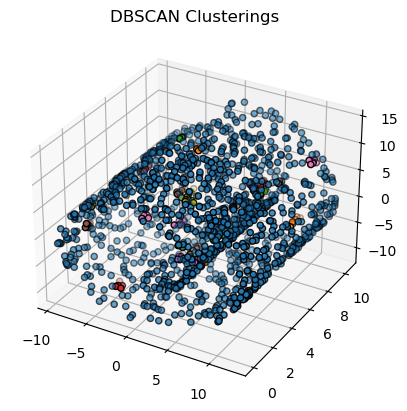

In [126]:
# Part C

from sklearn.cluster import DBSCAN
dbscan = DBSCAN().fit(X)
fig = plt.figure()
ax = plt.axes(projection='3d')
db_labels = dbscan.labels_

for l in np.unique(db_labels):
  ax.scatter(X[db_labels==l, 0], X[db_labels==l, 1], X[db_labels==l,2], edgecolor='k')
ax.set_title("DBSCAN Clusterings")
plt.show()

# P4-3. Clustering Handwritten Digits Data

In [127]:
from sklearn import datasets
digits, labels = datasets.load_digits(return_X_y=True)

In [128]:
from sklearn.cluster import KMeans, DBSCAN

kmeans = KMeans(init='random',n_clusters=10, n_init=10, random_state=0).fit(digits)
k_labels = kmeans.predict(digits)

dbscan = DBSCAN(eps=450, min_samples=30, algorithm='ball_tree').fit(digits)
db_labels = dbscan.labels_

In [129]:
# Part B

k_correct = sum(k_labels == labels)
db_correct = sum(db_labels == labels)

num_labels = len(labels)

print(f"KMeans accuracy: {round(k_correct*100/num_labels,2)}%")
print(f"DBSCAN accuracy: {round(db_correct*100/num_labels,2)}%")

KMeans accuracy: 25.99%
DBSCAN accuracy: 9.91%


\# Part C

KMeans consistenty outperformed DBSCAN over the various hyperparameters used. It's possible many of the digits were too similar for DBSCAN to distinguish between them and therefore led to its poor performance.

# Resources
- https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html